# **Prophet:**

* Prophet is an open-source forecasting tool developed by Facebook (now Meta) for time series forecasting.

* It is designed to handle business-related forecasting problems, such as predicting sales, website traffic, demand, or capacity planning.

The main advantages are:

    * Easy to use (you don’t need deep stats background).

    * Handles seasonality, holidays, and trends automatically.

    * Works well with messy real-world data (missing values, outliers).

    * Scales to large datasets.


# **🔹 How Prophet Works (Conceptually)**

* Prophet assumes that any time series can be broken into 3 main components:

### **1. Trend (g(t))**

* The long-term growth/decline in the data.

* Prophet models this using either:

* Linear growth (straight line up/down with change points).

* Logistic growth (S-curve, with an upper/lower limit).

### **2. Seasonality (s(t))**

* Repeating patterns at fixed periods.

  Examples:

* Weekly seasonality (weekdays vs weekends sales).

* Yearly seasonality (holidays, summer/winter cycles).

* Prophet models seasonality with Fourier series (a way to capture repeating cycles).

### **3. Holidays/Events (h(t))**

* Special days that cause spikes/drops (e.g., Black Friday, Ramadan, Christmas).

* You can manually add these as regressors.

### **4. Error term (εt)**

* Random noise Prophet cannot explain.

👉 Final model looks like:

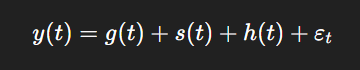




# **🔹 How It Actually Fits the Model**

* Prophet finds trend change points (places where the slope changes).

      Imagine your sales are growing with time, but not at a constant speed.

      From Jan to March → sales grow slowly

      From April to June → sales grow faster

      After July → sales become flat or decline

      Each time the growth rate (slope) changes, Prophet calls it a change point.
      So basically:

      A trend = long-term direction (upward, downward, flat).

      A change point = a date where that long-term slope suddenly changes.

and,

    🔹 How Prophet finds change points

      Prophet doesn’t try to guess them manually. Instead:

      1. Candidate Change Points

      * Prophet first selects potential points (by default, evenly spaced across the history of the data).

      * Example: If you have 365 days, it might place 25–50 candidate change points.

      2. Sparse Learning (L1 Regularization / Penalty)

      * It then fits a piecewise linear (or logistic) model with these candidates.

      * Not all candidates are used — Prophet applies a penalty so only important ones (where slope really changes) remain.

      👉 This is similar to how Lasso regression removes unnecessary coefficients.

      3. Final Change Points

      * The model automatically keeps only the dates where slope changed significantly.

      * That’s how Prophet adapts to sudden growth/decline phases.

* Fits seasonality using Fourier series regression.

      🔹 Why Fourier Series for Seasonality?

      Seasonality = repeating patterns (weekly, yearly, daily).

      Example:

      * Weekly seasonality → Sales are higher on weekends.

      * Yearly seasonality → Ice-cream sales rise every summer, drop in winter.

      * These are cyclical patterns.
      * **Fourier series** is a math tool to represent any periodic (repeating) function as a sum of sines and cosines.

      👉 So Prophet uses Fourier series to model seasonality.

      🔹 Fourier Series (Simple Idea)

        A Fourier series says:

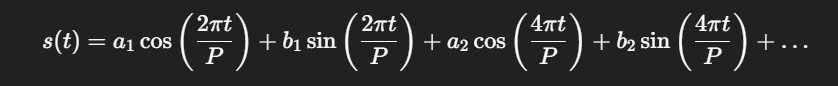


      here,
      * P = period (e.g., 7 days for weekly, 365 days for yearly).

      * The first sine/cosine pair captures simple smooth cycles.

      * Adding more terms captures more complex patterns.

      🔹 How Prophet Uses It

      1. Choose a period

        * Weekly = 7 days

        * Yearly = 365.25 days

      2. Choose number of terms (N)

        * Prophet has a parameter fourier_order.

        * For yearly seasonality, default is 10 (so 10 sine + 10 cosine terms).

      3. Build regressors
        * For each date 𝑡, Prophet computes:

          cos(2πkt/P), sin(2πkt/P) for k=1…N.


        * These become extra columns in regression.

      Fit regression coefficients
      Prophet learns weights (𝑎_𝑘 ,𝑏_𝑘) for each sine/cosine pair.
      The weighted sum is the seasonal component.

      🔹 Example (Yearly Seasonality)

      Suppose we use yearly seasonality (𝑃 = 365) with Fourier order = 3. Prophet creates:

          > cos(2πt/365),sin(2πt/365)

          > cos(4πt/365),sin(4πt/365)

          > cos(6πt/365),sin(6πt/365)

      Then fits coefficients to best match the repeating ups/downs of the data.

      🔹 Intuition

        * Low Fourier order → smooth, simple seasonal shape (like a wave).

        * High Fourier order → more flexible, can fit sharp seasonal spikes (like holidays).

      That’s why Prophet allows adjusting fourier_order for each seasonality.





* Adds holiday effects if provided.
  👉 Holiday effects are extra components that spike or dip the forecast on specific known dates.

  For example:

    * E-commerce → Black Friday, Cyber Monday cause a big sales jump.

    * Food delivery → Orders drop on Ramadan first day or during Eid.

    * Finance → No trading on New Year’s Day.

    * Prophet lets you explicitly tell the model which dates matter.

    * Holiday effects = manual knowledge you inject into Prophet so it can learn “special day spikes/drops” that normal seasonality can’t capture.



* Uses a generalized additive model (GAM) framework → trend + seasonality + events all added together.

Prophet sets up the model as:

      y(t)=g(t)+s(t)+h(t)+ε_t
	​

    g(t): Trend → piecewise linear/logistic growth (with change points).

    s(t): Seasonality → modeled using Fourier series (smooth repeating cycles).

    h(t): Holiday effects → dummy regressors (spikes/dips on given dates).

    ε_t : Noise → random errors Prophet can’t explain.

All these are separate functions fit together in a GAM.

🔹 Example

Suppose you forecast daily ice-cream sales 🍦:

Trend (g(t)) → upward slope because business is growing.

Seasonality (s(t)) → weekly pattern (weekend more sales, weekday less).

Holiday (h(t)) → big spike on Independence Day.

Final forecast = base upward trend + weekend bumps + holiday spike.


* Prophet is essentially just a regression model where time is decomposed into multiple additive effects (trend, seasonality, holidays), each modeled with its own technique (piecewise linear, Fourier series, dummy regressors), and then added together.

  🔹 Regression model ki pehchan

Koi bhi model regression tab kehlata hai jab:

  * Tumhare paas ek dependent variable (target, y) ho.

  * Tum usko ek ya zyada independent variables (regressors, x’s) se explain ya predict karne ki koshish karte ho.


# **🔹 Workflow (How You Use It)**

### **1. Prepare data (pandas DataFrame with 2 columns):**

      ds: dates (time column).

      y: values (target variable, e.g., sales).

### **2. Fit model:**

      from prophet import Prophet

      m = Prophet()
      m.fit(df)


### **3. Make future predictions:**

      future = m.make_future_dataframe(periods=30)  # forecast next 30 days

      forecast = m.predict(future)


### **4. Plot:**

      m.plot(forecast)

      m.plot_components(forecast)  # see trend, weekly, yearly effects


✅ So in short:
Prophet is basically a decomposable time series model (Trend + Seasonality + Events), wrapped in an easy-to-use package that makes forecasting fast, interpretable, and robust.

# **🔹 1. How They Think About Time Series**

## **1. ARIMA/SARIMA**

Thinks in terms of autocorrelation:

      y_t = 𝜙_1 y_t-1 + 𝜙_2 y_t-2 + .... + 𝜀_t

* Forecast is based on past values + past errors.

* Requires stationarity (constant mean/variance), so differencing is often needed.

## **Prophet**

Thinks in terms of components:

    y(t)=Trend(t)+Seasonality(t)+Holiday(t)+ε

* Forecast is built from additive parts (trend + seasonality + events).

* Doesn’t require strict stationarity (handles trends naturally).

## **🔹 2. Handling Trend**

ARIMA/SARIMA: Linear trend is handled by differencing, but sudden changes (structural breaks) are hard.

Prophet: Handles piecewise trends with change points automatically.

👉 Prophet is better if your data has shifts in growth rate.

## **🔹 3. Handling Seasonality**

ARIMA/SARIMA: Seasonality handled by seasonal differencing (SARIMA) → assumes very regular, repeating cycles.

Prophet: Seasonality modeled flexibly with Fourier series regression → can capture smooth or complex repeating cycles.

👉 Prophet is better when you have complex or multiple seasonalities (weekly + yearly).

## **🔹 4. Handling Holidays/Events**

ARIMA/SARIMA: No built-in way (you must add exogenous variables manually in SARIMAX).

Prophet: Directly supports holiday/event regressors.

👉 Prophet is better if your data has holiday spikes/dips.

## **🔹 5. Interpretability**

ARIMA/SARIMA: Harder to interpret (coefficients of AR, MA, differencing).

Prophet: Easy to interpret (plot trend, seasonality, holidays separately).

## **🔹 6. Data Requirements**

ARIMA/SARIMA: Needs well-preprocessed, stationary data. Sensitive to missing values/outliers.

Prophet: More robust to missing data, outliers, irregular spacing.

## **🔹 7. Automation**

ARIMA/SARIMA: Needs tuning of parameters (p, d, q, P, D, Q, s).

Prophet: Almost auto, just feed ds (date) + y (target).

# **🔹 When to Use Which?**

## **Use ARIMA/SARIMA if:**

You have short-term data (few months, small dataset).

Data is stationary or can be made stationary.

You want a purely statistical, traditional model.

## **Use Prophet if:**

You have business/real-world data with trends + multiple seasonalities + holidays.

You want interpretability (what’s driving the forecast).

You have messy data (missing, irregular).

You want quick forecasting without heavy tuning.

# **------------------------ Real life Example ------------------------**



## **Rossmann sales is a classic dataset — great choice to learn Prophet because it has:**

Daily sales (train.csv)

Store information (store.csv)

A test set for Kaggle submissions

A **sample submission.csv`

Let me walk you step by step on how to prepare it for Prophet and then fit forecasts.

### **🔹 1. What each file contains**

train.csv → Historical sales data (per store, daily).
Columns: Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday.

store.csv → Extra store info (assortment type, competition, promos, etc.).

test.csv → Future dates for which Kaggle expects predictions.

submission.csv → Just a sample submission file.

For Prophet learning, the most important is train.csv.

### **🔹 2. Focus on one store first**

Prophet works best per time series. Since Rossmann has 1115 stores, each with its own pattern, you usually forecast store by store.

👉 For practice: pick Store = 1 and forecast its daily sales.

# **🔹 3. Preparing the data**

Steps:

* Load train.csv

* Filter for one store

* Keep only Date and Sales columns

* Rename: Prophet expects ds (date) and y (target).

* Handle closed days (Open=0 → Sales = 0).

In [1]:
import pandas as pd

# Load training data
train = pd.read_csv("/content/sample_data/train.csv", parse_dates=["Date"])
train.head()

/tmp/ipython-input-2914805993.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/sample_data/train.csv", parse_dates=["Date"])


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931


In [2]:
# Focus on one store (e.g., Store 1)
store_id = 1
df = train[train["Store"] == store_id].copy()

# Prophet needs columns ds (date) and y (target)
df = df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})

# Check first rows
print(df.head())

             ds     y
0    2015-07-17  4852
1115 2015-07-16  4427
2230 2015-07-15  4767
3345 2015-07-14  5042
4460 2015-07-13  5054


# **🔹 4. Basic Prophet model**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v42kpk/7q59229u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v42kpk/47nclh7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41064', 'data', 'file=/tmp/tmpn9v42kpk/7q59229u.json', 'init=/tmp/tmpn9v42kpk/47nclh7d.json', 'output', 'file=/tmp/tmpn9v42kpk/prophet_modellkhplqhd/prophet_model-20250904125304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


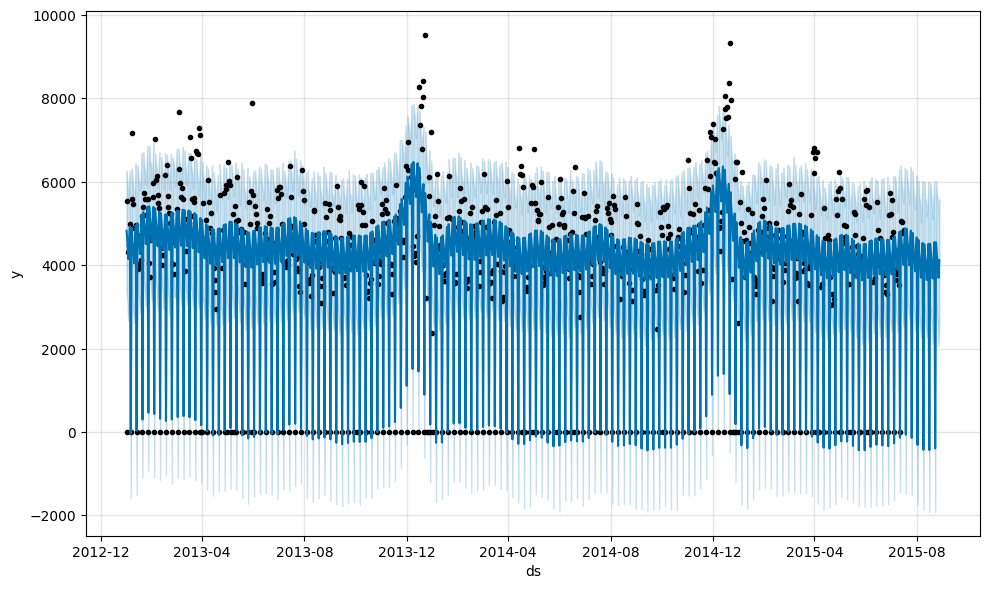

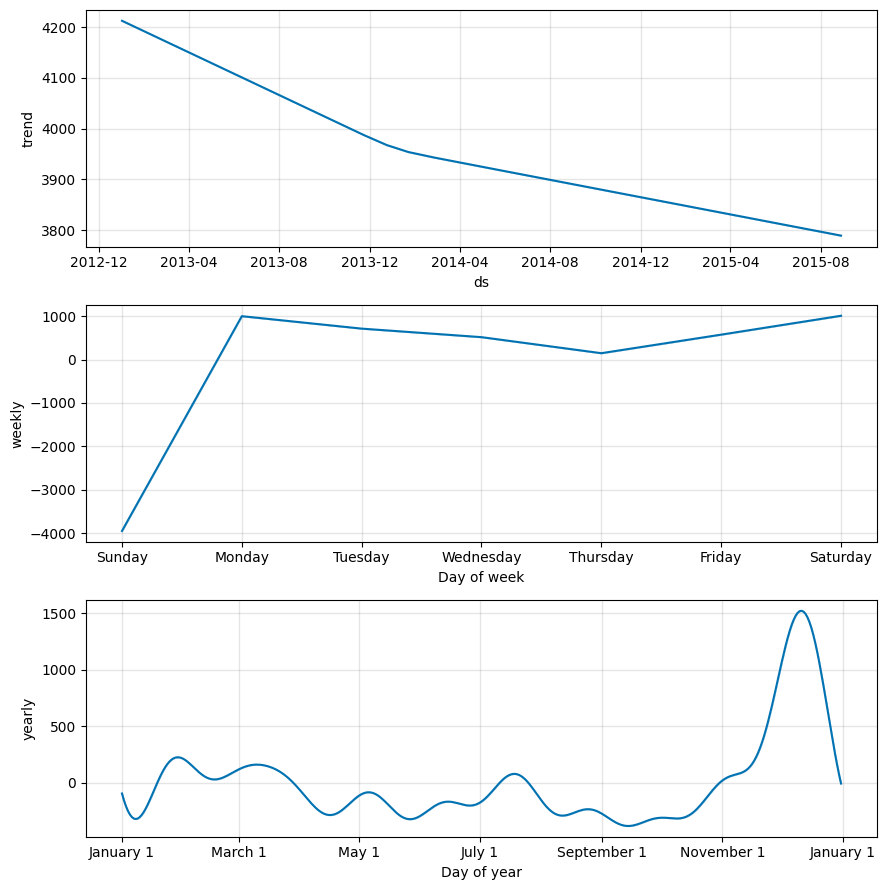

In [3]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Basic model
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

m.fit(df)

# Forecast next 6 weeks (42 days)
future = m.make_future_dataframe(periods=42)
forecast = m.predict(future)

# Plot
m.plot(forecast)
plt.show()

# Components (trend, weekly, yearly)
m.plot_components(forecast)
plt.show()


# **📊 How to Read That first Forecast Plot**
1. Black dots (⚫)

These are the real sales from dataset.

Example: 2013-01-01 → 5000 sales, so ek black dot plot hota hai 5000 pe.

👉 They show ground truth.

2. Blue line (━)

This is Prophet ka prediction (yhat).

Prophet ne trend + seasonality + promo sab mila kar ek line banayi jo expected sales dikhati hai.

It tries to pass through the middle of the black dots.

👉 Think of it as Prophet saying: “I believe the sales trend looks like this.”

3. Shaded blue area

Yeh Prophet ka confidence interval hai (uncertainty).

Prophet bolta hai: “Main sure nahi hoon ke future exactly 5200 hoga, lekin 95% chance hai ke sales iss shaded range ke andar rahengi.”

Isliye shading thodi wide hoti hai future mein (uncertainty zyada hoti hai).

# **🔹 5. Adding extra regressors (Promo, Holidays)**

Rossmann dataset has promo info, school holidays, state holidays. These can be added as extra regressors.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v42kpk/w3z5_yjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v42kpk/9e2qctui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93393', 'data', 'file=/tmp/tmpn9v42kpk/w3z5_yjj.json', 'init=/tmp/tmpn9v42kpk/9e2qctui.json', 'output', 'file=/tmp/tmpn9v42kpk/prophet_modelaa6ik67k/prophet_model-20250904125625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:56:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2381518251.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment 

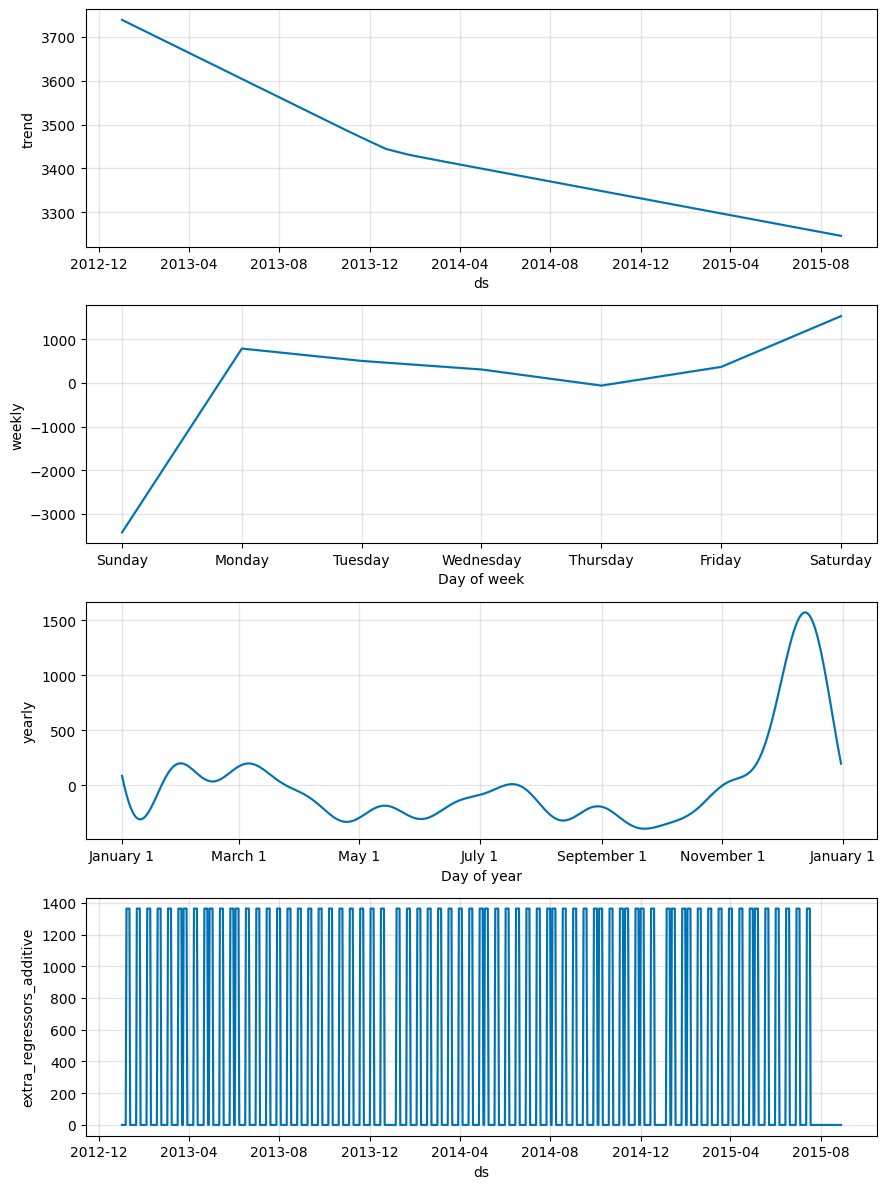

In [4]:
# Add regressors
df["promo"] = train.loc[train["Store"] == store_id, "Promo"]

m = Prophet(yearly_seasonality=True, weekly_seasonality=True)
m.add_regressor("promo")

m.fit(df)

# For forecasting, future dataframe must also have promo info
future = m.make_future_dataframe(periods=42)
future = future.merge(df[["ds", "promo"]], on="ds", how="left")
future["promo"].fillna(0, inplace=True)

forecast = m.predict(future)
m.plot_components(forecast)
plt.show()


# **🔹 Trend kya hota hai?**

* Trend = lambe time ka overall rukh (upar ya neeche).

* Agar tumhari sales har saal dheere dheere barh rahi hain, to woh upward trend hai 📈

* Agar sales slowly gir rahi hain, woh downward trend hai 📉

* Prophet mein trend straight line pieces se banta hai (piecewise linear).

👉 Think of trend as “big picture movement” ignoring short ups/downs.

# **🔹 Seasonality kya hoti hai?**

Seasonality = repeat hone wale chakkar (patterns jo bar-bar aatay hain).

Weekly seasonality: Sunday off → sales kam, Monday open → sales zyada (yeh pattern har week repeat hota hai).

Yearly seasonality: December mein Christmas → sales bohot barh jati hain, July/August holidays → sales ghat jati hain (yeh pattern har saal repeat hota hai).

👉 Think of seasonality as “regular repeated cycles”.


# **1️⃣ Trend (top panel)**

X-axis = time (ds)

Y-axis = underlying sales level.

It shows the long-term direction of sales (ignoring weekly/yearly bumps).

In your case: sales were high in 2013, then slowly declined until 2015.

That’s Prophet’s estimate of the business trend.

# **2️⃣ Weekly Seasonality (second panel)**

X-axis = day of week.

Y-axis = effect on sales relative to average.

Example from your chart:

Sunday is very low (negative effect, stores mostly closed).

Monday high positive bump (stores reopen).

Mid-week flatter.

Saturday positive bump again.

👉 This shows the weekly shopping behavior pattern.

# **3️⃣ Yearly Seasonality (third panel)**

X-axis = day of year (Jan → Dec).

Y-axis = effect relative to average.

Example from your chart:

Peaks around December → Christmas shopping boom 🎄.

Smaller peaks in March/April → Easter.

Low in summer (July/August) → people on holidays.

👉 This shows holiday + seasonal shopping cycles across the year.

# **4️⃣ Extra Regressor (bottom panel: extra_regressors_additive)**

X-axis = date

Y-axis = effect of your extra regressor (e.g., Promo).

It looks like vertical stripes because Promo is binary (0/1).

When promo=1, Prophet adds ~1200–1400 to predicted sales.

When promo=0, no boost.

👉 This means Promotions directly increase sales by ~1200+ units.

# **Summary:**

“The component plots show how Prophet decomposes the forecast. Trend captures long-term decline, weekly shows typical shopping behavior, yearly highlights seasonal events like Christmas, and extra regressors like Promo add boosts. The forecast plot combines all of these into the final prediction with uncertainty bounds.”

# **🔹 6. Adding real holidays**

For Germany (Rossmann’s country), you can also add national holidays:

In [5]:
from prophet.make_holidays import make_holidays_df

holidays = make_holidays_df(year_list=[2013,2014,2015], country="DE")  # Germany
m = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
m.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v42kpk/2yxbr99t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9v42kpk/pl555u_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65408', 'data', 'file=/tmp/tmpn9v42kpk/2yxbr99t.json', 'init=/tmp/tmpn9v42kpk/pl555u_b.json', 'output', 'file=/tmp/tmpn9v42kpk/prophet_modelyvu67zz5/prophet_model-20250904125732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:57:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:57:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# ✅ Summary:

* Start with one store (simple).

* Prepare ds (Date) and y (Sales).

* Fit Prophet, plot trend + seasonality.

* Add Promo, SchoolHoliday, StateHoliday as regressors.

* Add holidays for Germany.

* Finally, expand to all stores for full competition-like solution.

# **✅ Q1: Are holidays/Promo/SchoolHoliday called extra regressors?**

Yes 👍

In Prophet:

* Built-in regressors = trend + seasonality (weekly, yearly, daily).

* Extra regressors = any additional variable you provide yourself (e.g., promo, price, weather, holidays).

👉 So:

* Weekly seasonality ≈ built-in regressor

* Yearly seasonality ≈ built-in regressor

* Holiday effect (Eid, Christmas, school holidays) ≈ extra regressor if you give Prophet a column.

* Promo flag (0/1) ≈ extra regressor.

Think of extra regressors as side-information about your business that Prophet wouldn’t know by default.

# **✅ Q2: Why country="DE" means Germany?**

Prophet has a built-in holidays generator (make_holidays_df) that knows official holiday calendars for many countries.

"DE" is the ISO code for Germany (Rossmann is a German drugstore chain).

If you say country="DE", Prophet automatically fetches holidays like Christmas, German Unity Day, Easter, etc.

So instead of manually typing all holidays, you can just say "DE" and Prophet knows.

# **👉 In interviews, say this:**

“Prophet is a decomposable time series model. I start by preparing the dataset with ds and y. Prophet automatically models trend and seasonality. Then, I enrich the model with extra regressors like promotions and school holidays, and add country-specific holidays (DE for Germany in Rossmann). Finally, I generate future dates, make forecasts, and check components. This makes the model interpretable and business-friendly.”

# **✅ Q3: Explain like a kid — Steps to remember forever**

Okay, imagine you’re baking a cake 🎂 (forecast).

### **Step 1: Get Ingredients**

* Take the data (train.csv) = flour, sugar, milk.

* Rename columns: ds (date), y (sales).

* This is your base ingredient.

### **Step 2: Mix the Base**

* Put into Prophet → it automatically adds trend (cake base shape) and seasonality (layers in the cake).

* Boom! You already have a basic cake.

### **Step 3: Add Flavors (Extra Regressors)**

* Add promo → chocolate chips 🍫

* Add school holiday → sprinkles 🎉

* Add state holiday → cream topping 🍦

These are extra regressors: Prophet doesn’t know them, you feed them.

### **Step 4: Special Decoration (Country Holidays)**

* Tell Prophet country="DE" → it sprinkles German national holidays automatically.

* Now your cake looks more realistic! 🎂✨

### **Step 5: Bake Future Cake**

* make_future_dataframe(periods=...) = extend dates into the future.

* Prophet bakes the cake forward → prediction of future sales.

### **Step 6: Taste & Adjust**

* Plot components (plot_components) → see if trend/seasonality make sense.

### **Tune knobs:**

* changepoint_prior_scale → how flexible the trend can change.

* seasonality_prior_scale → how flexible seasonality is.

* seasonality_mode='multiplicative' → if seasonal effect grows with sales size.